✔ Dataset Loaded Successfully!

   asm_commands_add  asm_commands_call  asm_commands_cdq  asm_commands_cld  \
0               436              646.0               0.0              10.0   
1               469              262.0               0.0               4.0   
2              1587             1828.0               0.0               0.0   
3               213              227.0               0.0               0.0   
4                36               76.0               0.0               0.0   

   asm_commands_cli  asm_commands_cmc  asm_commands_cmp  asm_commands_cwd  \
0               9.0               0.0             228.0               0.0   
1               1.0               4.0             185.0               4.0   
2              31.0               0.0             689.0               0.0   
3               3.0               0.0             127.0               0.0   
4               0.0               0.0              15.0               0.0   

   asm_commands_daa  asm_commands_dd

<Axes: >

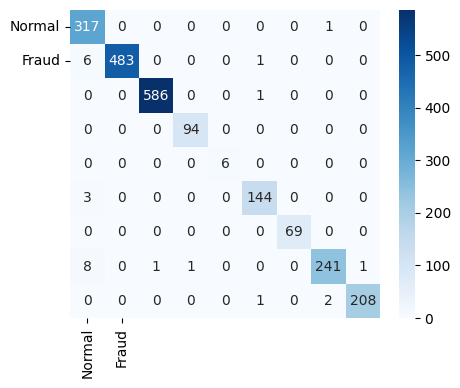

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)

df = pd.read_csv("/content/data.csv")

print("✔ Dataset Loaded Successfully!\n")
print(df.head())

X = df.drop("Class", axis=1)
y = df["Class"]

numeric_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)
print("\n✔ Model Training Completed!")

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

print("\n============= MODEL PERFORMANCE ============")
print("Accuracy  :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred, average='weighted'))
print("Recall    :", recall_score(y_test, y_pred, average='weighted'))
print("ROC-AUC   :", roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted'))
print("==============================================\n")


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Fraud"],
            yticklabels=["Normal", "Fraud"])

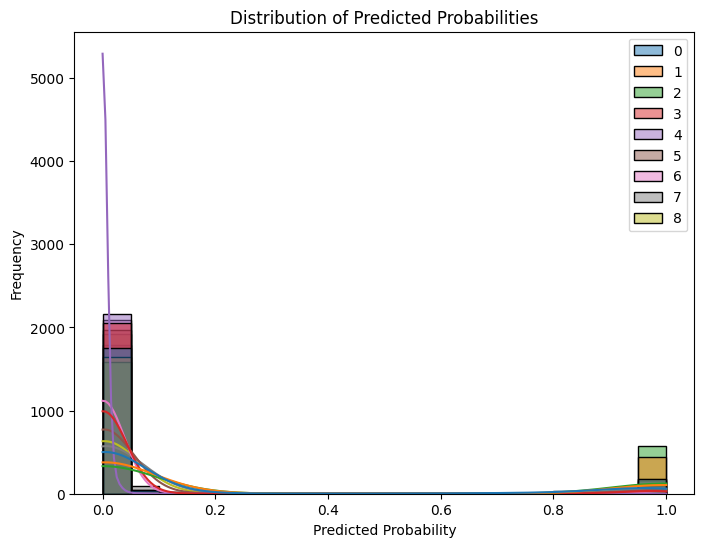

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(y_prob, bins=20, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import zipfile
import os

zip_file_path = '/content/archive (1).zip'
extract_dir = '/content/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"✔ Files extracted to {extract_dir}")
print("Extracted files:")
for root, dirs, files in os.walk(extract_dir):
    for file in files:
        print(os.path.join(root, file))

✔ Files extracted to /content/
Extracted files:
/content/archive (1).zip
/content/data.csv
/content/.config/.last_opt_in_prompt.yaml
/content/.config/gce
/content/.config/default_configs.db
/content/.config/.last_update_check.json
/content/.config/config_sentinel
/content/.config/.last_survey_prompt.yaml
/content/.config/active_config
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/configurations/config_default
/content/.config/logs/2025.11.20/14.30.45.937471.log
/content/.config/logs/2025.11.20/14.30.36.623222.log
/content/.config/logs/2025.11.20/14.30.35.382199.log
/content/.config/logs/2025.11.20/14.30.04.285207.log
/content/.config/logs/2025.11.20/14.30.27.010422.log
/content/.config/logs/2025.11.20/14.30.45.231815.log
/content/Dataset/Dataset/sorted_test_id.csv
/content/Dataset/Dataset/trainLabels.csv
/content/Dataset/Dataset/train/LargeTrain.csv
/content/Dataset/Dataset/test/LargeTest.csv
/content/sample_data/README.md
/content/sam

In [ ]:
display(y_prob)

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 1.   ],
       [0.   , 0.005, 0.005, ..., 0.   , 0.025, 0.015],
       [0.   , 0.   , 0.   , ..., 0.   , 0.995, 0.005],
       ...,
       [0.01 , 0.96 , 0.   , ..., 0.   , 0.005, 0.   ],
       [0.   , 0.   , 1.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , ..., 0.   , 0.   , 0.   ]])

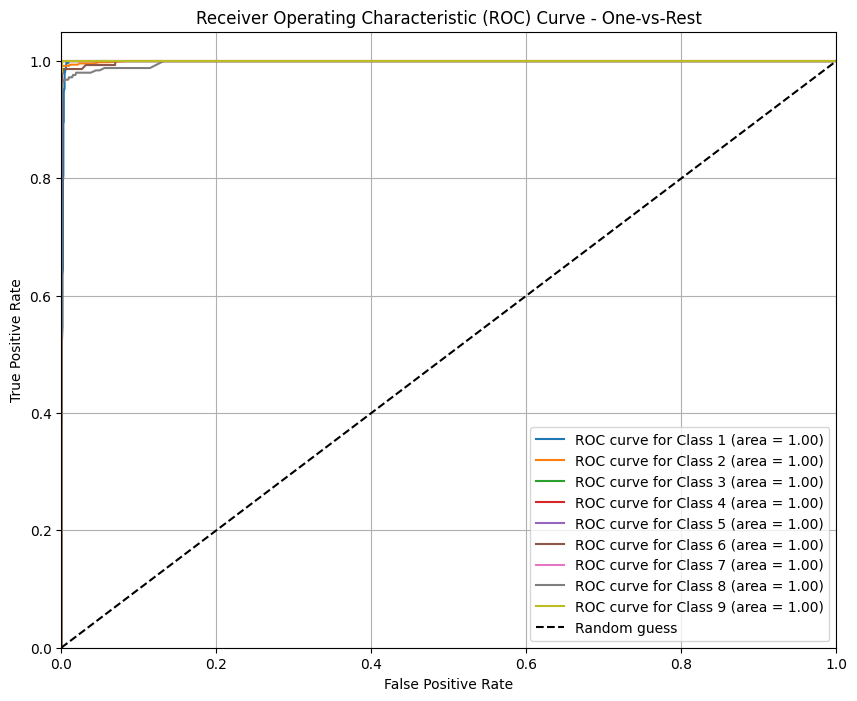

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Convert y_test to one-hot encoded format for plotting ROC curves for multiclass
label_binarizer = LabelBinarizer()
y_test_binarized = label_binarizer.fit_transform(y_test)
n_classes = y_test_binarized.shape[1]

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve for Class {label_binarizer.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - One-vs-Rest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()